In [5]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
train = pd.read_csv('train_0211.csv')
test = pd.read_csv('test_0211.csv')

In [7]:
train.head()

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,lead_owner,is_converted,customer_continent,customer_type_category,inquiry_category
0,1.0,Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,0.0,0.0,...,less than 3 months,1,0,0.003079,0.026846,0,True,Asia,End-User,quotation/purchase
1,1.0,Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,0.0,0.0,...,less than 3 months,1,0,0.003079,0.026846,1,True,Asia,End-User,quotation/purchase
2,1.0,India,AS,0.088889,1755,End-Customer,Enterprise,144.0,0.0,0.0,...,less than 3 months,1,0,0.003079,0.026846,2,True,Asia,End-User,product inquiry
3,1.0,India,AS,0.088889,4919,End-Customer,Enterprise,NaN,0.0,0.0,...,less than 3 months,1,0,0.003079,0.026846,3,True,Asia,End-User,quotation/purchase
4,1.0,India,AS,0.088889,17126,Specifier/Influencer,Enterprise,NaN,0.0,0.0,...,less than 3 months,0,0,0.003079,0.026846,4,True,Asia,Specifier/Influencer,quotation/purchase


In [8]:
test.head()

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,lead_owner,is_converted,customer_continent,customer_type_category,inquiry_category
0,0.00,Philippines,ID,0.073248,47466,End-Customer,Enterprise,53.0,0.0,0.0,...,unknown,1,0,0.001183,0.049840,278,0,Asia,End-User,uncategorized
1,0.25,Philippines,IT,0.000000,5405,End-Customer,SMB,NaN,0.0,0.0,...,unknown,0,0,0.000013,0.000000,437,1,Asia,End-User,quotation/purchase
2,1.00,India,ID,0.000000,13597,Specifier/Influencer,SMB,NaN,0.0,0.0,...,less than 3 months,0,0,0.000060,0.131148,874,0,Asia,Specifier/Influencer,quotation/purchase
3,0.50,India,ID,0.118644,17204,Others,Enterprise,NaN,0.0,0.0,...,more than a year,0,0,0.001183,0.049840,194,0,Asia,Others,quotation/purchase
4,1.00,India,ID,0.074949,2329,End-Customer,Enterprise,2.0,1.0,0.0,...,less than 3 months,1,1,0.003079,0.064566,167,0,Asia,End-User,quotation/purchase


In [9]:
train.columns

Index(['bant_submit', 'customer_country', 'business_unit',
       'com_reg_ver_win_rate', 'customer_idx', 'customer_type', 'enterprise',
       'historical_existing_cnt', 'id_strategic_ver', 'it_strategic_ver',
       'idit_strategic_ver', 'customer_job', 'lead_desc_length',
       'product_category', 'customer_position', 'response_corporate',
       'expected_timeline', 'ver_cus', 'ver_pro', 'ver_win_rate_x',
       'ver_win_ratio_per_bu', 'lead_owner', 'is_converted',
       'customer_continent', 'customer_type_category', 'inquiry_category'],
      dtype='object')

# 카테고리 별 전환율 생성 함수

In [74]:
# def add_conversion_rate(df, group_column):
    
#     df[f'{group_column}_converted_rate'] = df.groupby(group_column)['is_converted'].transform('mean')
    
#     return df

In [17]:
def add_conversion_rate(df_train, df_test, group_column):
    # train 데이터에서 각 그룹의 전환율 계산
    group_conversion_rates = df_train.groupby(group_column)['is_converted'].mean()
    
    # train 데이터에 계산된 전환율을 맵핑하여 새로운 컬럼 생성
    df_train[f'{group_column}_converted_rate'] = df_train[group_column].map(group_conversion_rates)
    
    # test 데이터에도 train 데이터에서 계산된 전환율을 맵핑하여 새로운 컬럼 생성
    df_test[f'{group_column}_converted_rate'] = df_test[group_column].map(group_conversion_rates)
    
    return df_train, df_test

# 카테고리 별 전환율 시각화

In [18]:
def plot_conversion_rate(df, group_column):

    # Calculate conversion rates for each group
    conversion_rates = df.groupby(group_column)['is_converted'].mean().nlargest(20)
    
    plt.figure(figsize=(10, 6))
    conversion_rates.plot(kind='bar', color='skyblue')
    plt.title(f'Conversion Rate by {group_column}')
    plt.xlabel(group_column)
    plt.ylabel('Conversion Rate')
    plt.xticks(rotation=90)
    plt.show()

## customer_continent별 전환율

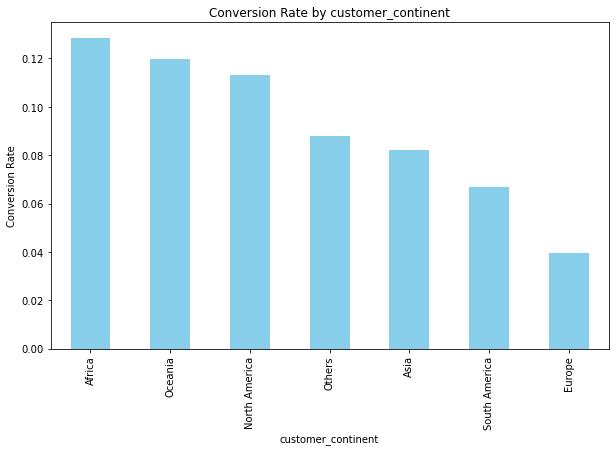

In [19]:
train, test = add_conversion_rate(train, test, 'customer_continent')
plot_conversion_rate(train, 'customer_continent')

## customer_idx별 전환율

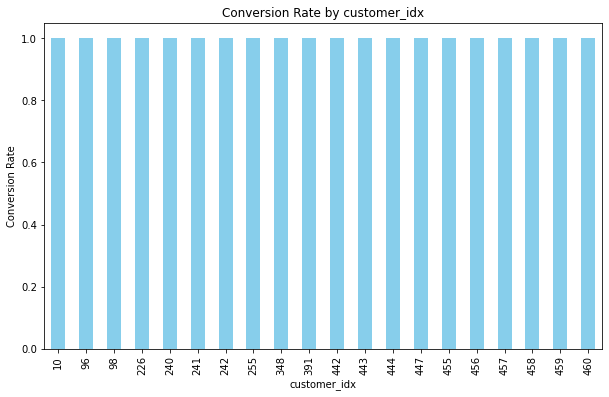

In [20]:
train, test = add_conversion_rate(train, test, 'customer_idx')
plot_conversion_rate(train, 'customer_idx')

## customer_type_category별 전환율

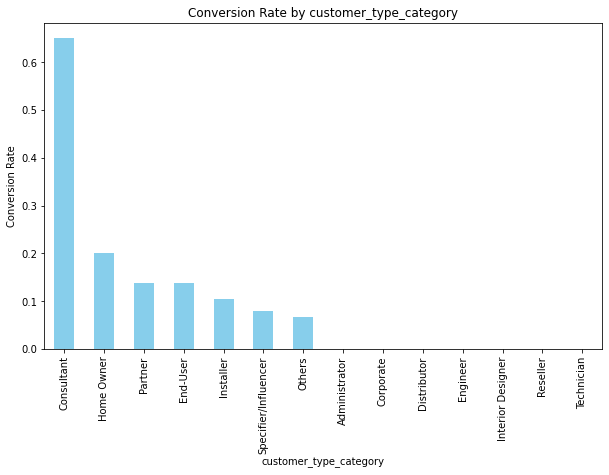

In [21]:
train, test = add_conversion_rate(train, test, 'customer_type_category')
plot_conversion_rate(train, 'customer_type_category')

## customer_position별 전환율

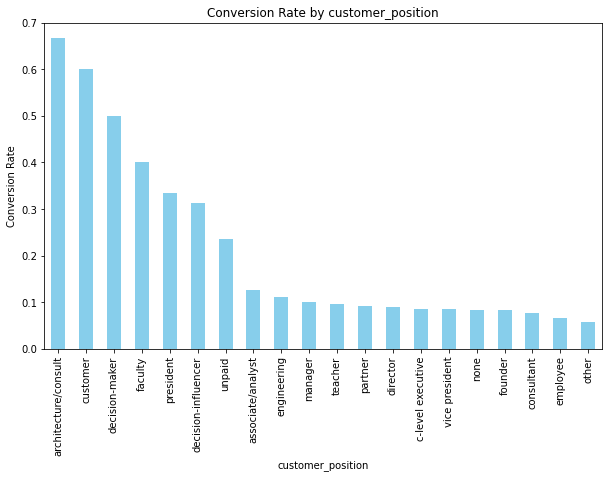

In [22]:
train, test = add_conversion_rate(train, test, 'customer_position')
plot_conversion_rate(train, 'customer_position')

## business_unit별 전환율

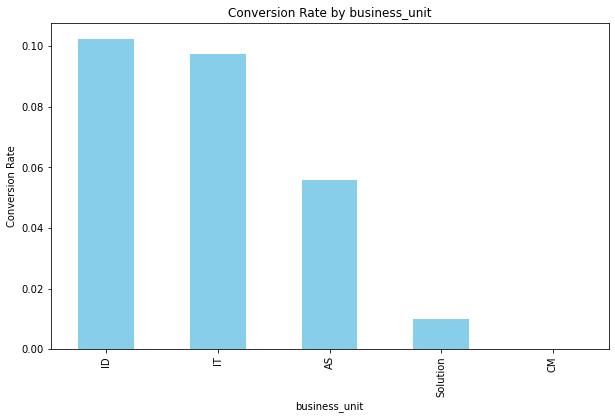

In [23]:
train, test = add_conversion_rate(train, test, 'business_unit')
plot_conversion_rate(train, 'business_unit')

## response_corporate별 전환율 

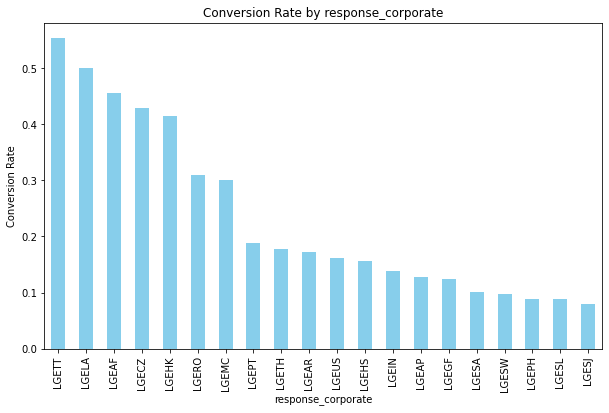

In [24]:
train, test = add_conversion_rate(train, test, 'response_corporate')
plot_conversion_rate(train, 'response_corporate')

## lead_owner별 전환율

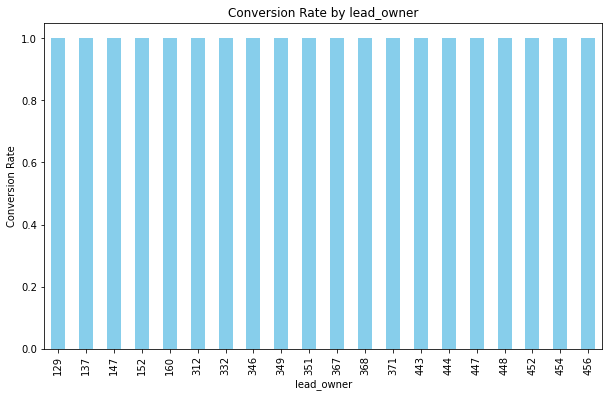

In [25]:
train, test = add_conversion_rate(train, test, 'lead_owner')
plot_conversion_rate(train, 'lead_owner') 

## product_category별 전환율

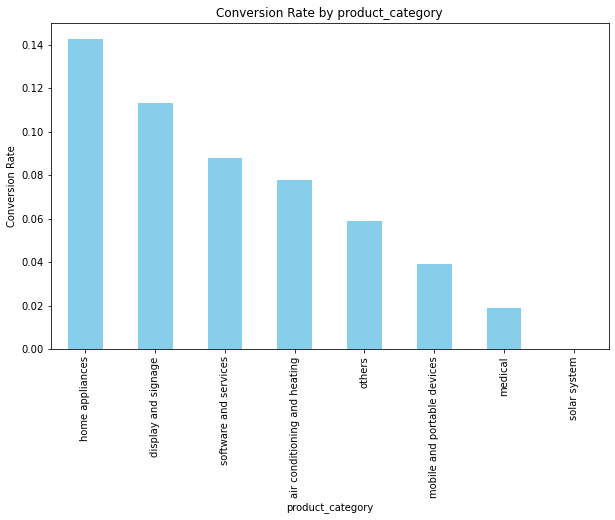

In [26]:
train, test = add_conversion_rate(train, test, 'product_category')
plot_conversion_rate(train, 'product_category')

## inquiry_category별 전환율

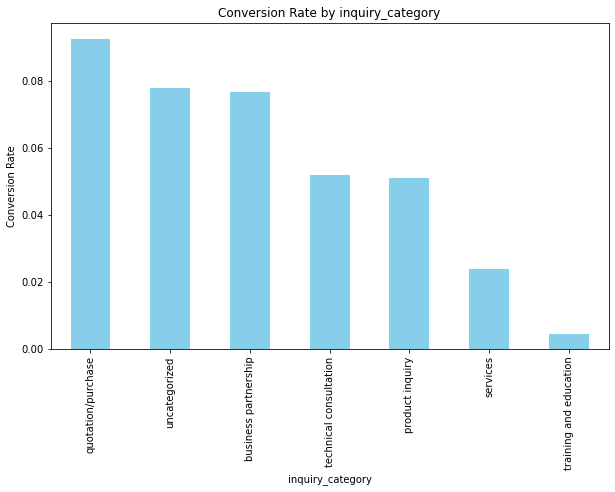

In [27]:
train, test = add_conversion_rate(train, test, 'inquiry_category')
plot_conversion_rate(train, 'inquiry_category')

## bant_submit별 전환율

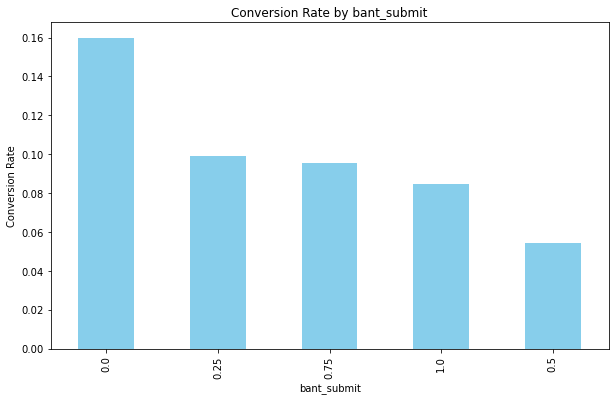

In [28]:
train, test = add_conversion_rate(train, test, 'bant_submit')
plot_conversion_rate(train, 'bant_submit')

## expected_timeline별 전환율

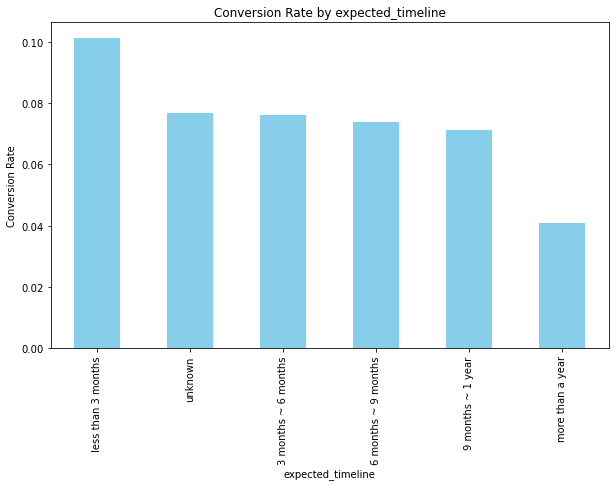

In [29]:
train, test = add_conversion_rate(train, test, 'expected_timeline')
plot_conversion_rate(train, 'expected_timeline') 

## enterprise별 전환율

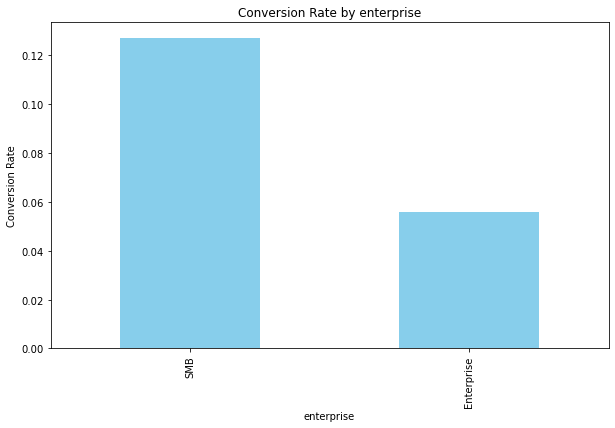

In [30]:
train, test = add_conversion_rate(train, test, 'enterprise')
plot_conversion_rate(train, 'enterprise') 

In [31]:
train.columns

Index(['bant_submit', 'customer_country', 'business_unit',
       'com_reg_ver_win_rate', 'customer_idx', 'customer_type', 'enterprise',
       'historical_existing_cnt', 'id_strategic_ver', 'it_strategic_ver',
       'idit_strategic_ver', 'customer_job', 'lead_desc_length',
       'product_category', 'customer_position', 'response_corporate',
       'expected_timeline', 'ver_cus', 'ver_pro', 'ver_win_rate_x',
       'ver_win_ratio_per_bu', 'lead_owner', 'is_converted',
       'customer_continent', 'customer_type_category', 'inquiry_category',
       'customer_continent_converted_rate', 'customer_idx_converted_rate',
       'customer_type_category_converted_rate',
       'customer_position_converted_rate', 'lead_owner_converted_rate',
       'business_unit_converted_rate', 'response_corporate_converted_rate',
       'product_category_converted_rate', 'inquiry_category_converted_rate',
       'bant_submit_converted_rate', 'expected_timeline_converted_rate',
       'enterprise_converted_

In [32]:
test.columns

Index(['bant_submit', 'customer_country', 'business_unit',
       'com_reg_ver_win_rate', 'customer_idx', 'customer_type', 'enterprise',
       'historical_existing_cnt', 'id_strategic_ver', 'it_strategic_ver',
       'idit_strategic_ver', 'customer_job', 'lead_desc_length',
       'product_category', 'customer_position', 'response_corporate',
       'expected_timeline', 'ver_cus', 'ver_pro', 'ver_win_rate_x',
       'ver_win_ratio_per_bu', 'lead_owner', 'is_converted',
       'customer_continent', 'customer_type_category', 'inquiry_category',
       'customer_continent_converted_rate', 'customer_idx_converted_rate',
       'customer_type_category_converted_rate',
       'customer_position_converted_rate', 'lead_owner_converted_rate',
       'business_unit_converted_rate', 'response_corporate_converted_rate',
       'product_category_converted_rate', 'inquiry_category_converted_rate',
       'bant_submit_converted_rate', 'expected_timeline_converted_rate',
       'enterprise_converted_

### 전환율 0.3 이상인 값?

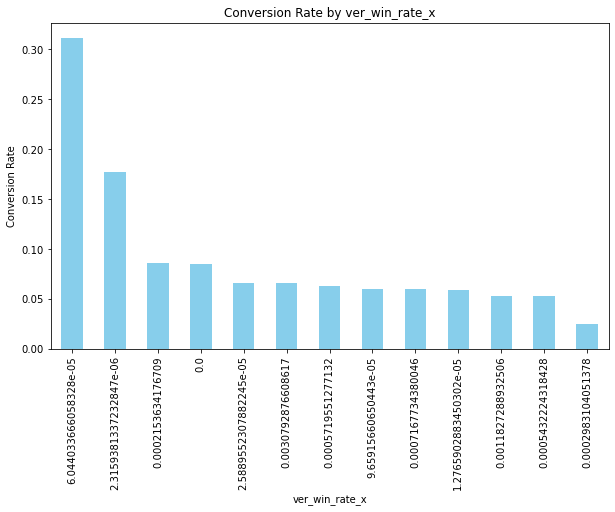

In [99]:
plot_conversion_rate(train, 'ver_win_rate_x') 

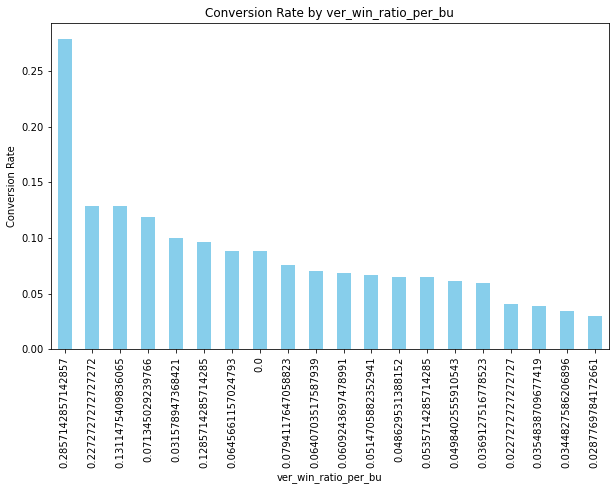

In [102]:
plot_conversion_rate(train, 'ver_win_ratio_per_bu') 